In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import train_test_split
import re

In [ ]:
#Загружаем первую часть размеченного корпуса
negative = pd.read_csv("negative.csv", sep=';', header = None)

negative

,0,1,2,3,4,5,6,7,8,9,10,11
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...
111918,425138243257253888,1390195830,Yanch_96,Но не каждый хочет что то исправлять:( http://...,-1,0,0,0,1138,32,46,0
111919,425138339503943682,1390195853,tkit_on,скучаю так :-( только @taaannyaaa вправляет мо...,-1,0,0,0,4822,38,32,0
111920,425138437684215808,1390195876,ckooker1,"Вот и в школу, в говно это идти уже надо(",-1,0,0,1,165,13,16,0
111921,425138490452344832,1390195889,LisaBeroud,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",-1,0,1,0,2516,187,265,0


In [ ]:
#Загружаем вторую часть размеченного корпуса
positive = pd.read_csv("positive.csv", sep=';', header = None)

positive

,0,1,2,3,4,5,6,7,8,9,10,11
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
114906,411368729235054592,1386912922,diminlisenok,"Спала в родительском доме, на своей кровати......",1,0,0,0,1497,56,34,2
114907,411368729424187392,1386912922,qilepocagotu,RT @jebesilofyt: Эх... Мы немного решили сокра...,1,0,1,0,692,225,210,0
114908,411368796537257984,1386912938,DennyChooo,"Что происходит со мной, когда в эфире #proacti...",1,0,0,0,4905,448,193,13
114909,411368797447417856,1386912938,bedowabymir,"""Любимая,я подарю тебе эту звезду..."" Имя како...",1,0,0,0,989,254,251,0


In [ ]:
#Выбираем 3 столбец, потому что предстоит работать только с текстом
positive_text = pd.DataFrame(positive.iloc[:, 3])
negative_text = pd.DataFrame(negative.iloc[:, 3])

In [ ]:
#Маркируем позитивные и негативные тексты за 0 и 1 в дополнительную колонку
positive_text['label'] = [1] * positive_text.shape[0]
negative_text['label'] = [0] * negative_text.shape[0]

In [ ]:
#Складываем тексты
labeled_tweets = pd.concat([positive_text, negative_text])

In [ ]:
#Исправим нумерацию корпуса
labeled_tweets.index = range(labeled_tweets.shape[0])

In [ ]:
#Переименуем колонки
labeled_tweets.columns = ['text', 'label']
labeled_tweets

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",1
1,"Да, все-таки он немного похож на него. Но мой ...",1
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1
...,...,...
226829,Но не каждый хочет что то исправлять:( http://...,0
226830,скучаю так :-( только @taaannyaaa вправляет мо...,0
226831,"Вот и в школу, в говно это идти уже надо(",0
226832,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",0


In [ ]:
#Функция очистки текста от не кириллических символов
def clear_text(text):
    clear_text = re.sub(r'[^А-яЁё]+', ' ', text).lower()
    return " ".join(clear_text.split())

#Функция очистки текста от наречий, союзов, предлогов и т.д
def clean_stop_words(text, stopwords):
    text = [word for word in text.split() if word not in stopwords]
    return " ".join(text)

In [ ]:
#Загружаем таблицу со стопсловами
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords
stopwords = set(nltk_stopwords.words('russian'))
np.array(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array({'там', 'себе', 'два', 'ни', 'им', 'его', 'ему', 'чтоб', 'всего', 'том', 'один', 'он', 'всех', 'и', 'вас', 'какой', 'или', 'что', 'ним', 'разве', 'сам', 'них', 'не', 'был', 'до', 'на', 'ты', 'будто', 'моя', 'нельзя', 'по', 'если', 'кто', 'можно', 'при', 'ли', 'сейчас', 'от', 'себя', 'ж', 'этом', 'как', 'ведь', 'ничего', 'тебя', 'свою', 'были', 'этот', 'куда', 'чего', 'ней', 'между', 'об', 'я', 'ее', 'ну', 'вот', 'чем', 'почти', 'они', 'впрочем', 'было', 'все', 'еще', 'здесь', 'всегда', 'три', 'во', 'эту', 'надо', 'эти', 'же', 'она', 'более', 'конечно', 'для', 'вдруг', 'со', 'теперь', 'раз', 'хорошо', 'совсем', 'без', 'мой', 'другой', 'но', 'этой', 'из', 'нет', 'будет', 'ей', 'уже', 'больше', 'потому', 'над', 'такой', 'зачем', 'перед', 'быть', 'где', 'чуть', 'бы', 'наконец', 'мне', 'никогда', 'только', 'их', 'какая', 'есть', 'про', 'то', 'того', 'тем', 'нибудь', 'много', 'всю', 'вы', 'чтобы', 'с', 'а', 'вам', 'была', 'может', 'меня', 'опять', 'тоже', 'нее', 'мы', 'тогда', 'хоть', 

In [ ]:
#Делаем очищенные тексты
labeled_tweets['text_clear'] = labeled_tweets['text'].apply(lambda x: clean_stop_words(clear_text(str(x)), stopwords))

In [ ]:
#Меняем тексты на обрабтанные в корпусе
labeledtweets = labeled_tweets[['text_clear','label']]
labeledtweets.columns = ['text','label']
labeledtweets

,text,label
0,школота поверь самое общество профилирующий пр...,1
1,таки немного похож мальчик равно,1
2,идиотка испугалась,1
3,углу сидит погибает голода ещё порции взяли хо...,1
4,значит страшилка блин посмотрев части создастс...,1
...,...,...
226829,каждый хочет исправлять,0
226830,скучаю вправляет мозги равно скучаю,0
226831,школу говно это идти,0
226832,тауриэль грусти обнял,0


In [ ]:
train, test = train_test_split(labeledtweets,
                        test_size = 0.2,
                        random_state = 128,
                       )

print(train.shape)
print(test.shape)

(181467, 2)
(45367, 2)


In [ ]:
for sample in [train, test]:
    print(sample[sample['label'] == 1].shape[0] / sample.shape[0])

0.506246314756953
0.5079463045826261


In [ ]:
train


,text,label
23610,м шинами собаки это души воленны гаишников,1
181822,высплюсь это случится сегодня,0
23051,правильные вещи девушка говорит почему модных ...,1
168645,почему снова умер боже спасибо,0
159690,счастье удача забыли моем существовании,0
...,...,...
122402,очень хочу тренировку,0
51210,всё понял увидел,1
117074,буду дани одна тяжело,0
95717,азамат самый заразительный смех каз тв днем ро...,1


In [ ]:
filteredtext = train['text']
filteredtext[:10]

23610            м шинами собаки это души воленны гаишников
181822                        высплюсь это случится сегодня
23051     правильные вещи девушка говорит почему модных ...
168645                       почему снова умер боже спасибо
159690              счастье удача забыли моем существовании
189693    спина полковника шорина который слов мохнаткин...
2757                               ахахах каждый говорю иду
35949                                  заплатил это вассаби
66865                            ахаха скажешь будут внучки
67236     значит почему наши стояли это всё англичанка в...
Name: text, dtype: object

In [ ]:
num_words = 10000
max_tweet_len = 100

In [ ]:
y_train = train['label']
y_train

23610     1
181822    0
23051     1
168645    0
159690    0
         ..
122402    0
51210     1
117074    0
95717     1
220243    0
Name: label, Length: 181467, dtype: int64

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(filteredtext)

In [ ]:
tokenizer.word_index

{'это': 1,
 'сегодня': 2,
 'очень': 3,
 'хочу': 4,
 'день': 5,
 'просто': 6,
 'тебе': 7,
 'завтра': 8,
 'вообще': 9,
 'всё': 10,
 'спасибо': 11,
 'буду': 12,
 'могу': 13,
 'почему': 14,
 'блин': 15,
 'люблю': 16,
 'знаю': 17,
 'всем': 18,
 'год': 19,
 'спать': 20,
 'дома': 21,
 'ещё': 22,
 'новый': 23,
 'время': 24,
 'делать': 25,
 'пока': 26,
 'х': 27,
 'хочется': 28,
 'такое': 29,
 'такая': 30,
 'настроение': 31,
 'нужно': 32,
 'такие': 33,
 'плохо': 34,
 'вчера': 35,
 'скоро': 36,
 'мои': 37,
 'хотя': 38,
 'мама': 39,
 'дня': 40,
 'утро': 41,
 'нам': 42,
 'ахах': 43,
 'люди': 44,
 'жизнь': 45,
 'домой': 46,
 'жаль': 47,
 'нг': 48,
 'никто': 49,
 'кого': 50,
 'жизни': 51,
 'года': 52,
 'весь': 53,
 'бля': 54,
 'сижу': 55,
 'утра': 56,
 'равно': 57,
 'ахаха': 58,
 'думаю': 59,
 'правда': 60,
 'вроде': 61,
 'школу': 62,
 'надеюсь': 63,
 'таки': 64,
 'кажется': 65,
 'мной': 66,
 'одна': 67,
 'человек': 68,
 'смотреть': 69,
 'круто': 70,
 'привет': 71,
 'нравится': 72,
 'болит': 73,
 'т'

In [ ]:
sequences = tokenizer.texts_to_sequences(filteredtext)

In [ ]:
x_train = pad_sequences(sequences, maxlen=max_tweet_len)

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_tweet_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_save_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=2,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[checkpoint_callback])

Epoch 1/10
1135/1135 [==============================] - ETA: 0s - loss: 0.5779 - accuracy: 0.6896
Epoch 1: val_accuracy improved from -inf to 0.71593, saving model to best_model.h5
1135/1135 [==============================] - 441s 387ms/step - loss: 0.5779 - accuracy: 0.6896 - val_loss: 0.5501 - val_accuracy: 0.7159
Epoch 2/10
1135/1135 [==============================] - ETA: 0s - loss: 0.5250 - accuracy: 0.7318
Epoch 2: val_accuracy improved from 0.71593 to 0.71767, saving model to best_model.h5
1135/1135 [==============================] - 438s 386ms/step - loss: 0.5250 - accuracy: 0.7318 - val_loss: 0.5462 - val_accuracy: 0.7177
Epoch 3/10
1135/1135 [==============================] - ETA: 0s - loss: 0.4918 - accuracy: 0.7526
Epoch 3: val_accuracy did not improve from 0.71767
1135/1135 [==============================] - 444s 391ms/step - loss: 0.4918 - accuracy: 0.7526 - val_loss: 0.5562 - val_accuracy: 0.7167
Epoch 4/10
1135/1135 [==============================] - ETA: 0s - loss: 0.4

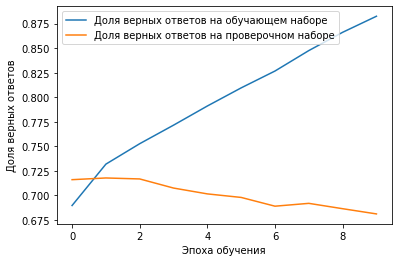

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.load_weights(model_save_path)

In [ ]:
test

,text,label
23241,агаа вообще восхитительно часто собой берут,1
202127,думал друзей теряют ссорах оказалось просто ра...,0
90988,давайте повода ревности,1
163075,шли кристей обсуждали других классов аж красав...,0
98621,че время долго идет хочу колледж быстрее ая пара,1
...,...,...
154605,ооооо иисусе помоги дожить каникул,0
222783,ппц бля заболела технарь ходить нужно переписы...,0
187111,уродство елка герлядны самый уродский нг,0
91721,люблю зиму люди носом разблокируют телефоны та...,1


In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['text'])

In [ ]:
x_test = pad_sequences(test_sequences, maxlen=max_tweet_len)

In [ ]:
y_test = test['label']

In [ ]:
model.evaluate(x_test, y_test, verbose=1)

1418/1418 [==============================] - 49s 34ms/step - loss: 0.5485 - accuracy: 0.7109


[0.5484915375709534, 0.7109132409095764]

In [ ]:
text = '''Хватит нести чушь. Ты вообще не понимаешь что происходит у нас. Люди умирают пачками, а ты пишешь свои твиты про ущемление женщин. Дура
'''

In [ ]:
sequence = tokenizer.texts_to_sequences([text])

NameError: ignored

In [ ]:
sequence

[[117, 278, 484, 359]]

In [ ]:
data = pad_sequences(sequence, maxlen=max_tweet_len)

In [ ]:
result = model.predict(data)

In [ ]:
result

array([[0.9855312]], dtype=float32)